# バックテスト検証ノート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../'

/home/tsu-nera/repo/bakuchi


In [3]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [4]:
timestamp="2003142355"

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(23266, 23266)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=1000)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-14 23:55:18,liquid,coincheck,BTC/JPY,0.009,18


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-14 23:55:18,買い,liquid,585888.0
1,2020-03-14 23:55:18,売り,coincheck,587897.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
--------  -------------------
開始日時  2020-03-14 23:55:18
終了日時  2020-03-15 06:56:23
--------  -------------------
利確しきい値 1000(JPY)
取引単位 0.009(BTC)
--------

バックテスト結果
---------  ------
利益(BTC)  -0
元金(BTC)   0.022
資産(BTC)   0.022
---------  ------
---------  -----
取引回数       1
利益(JPY)     18
元金(JPY)  12000
資産(JPY)  12018
---------  -----


## グラフ出力

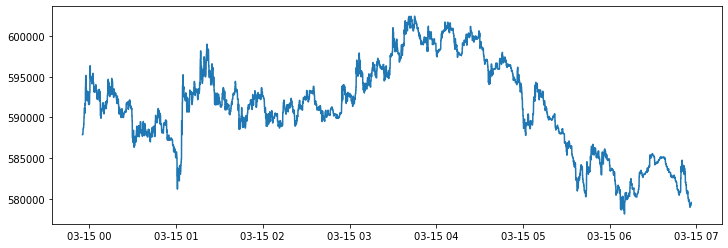

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

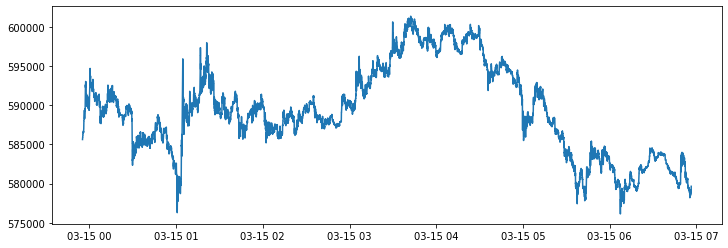

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-14 23:50:00,-227,1835,591579,589744,589517,589744
2020-03-15 00:00:00,-246,1901,592976,591075,590829,591075
2020-03-15 00:10:00,-217,1784,592694,590911,590693,590911
2020-03-15 00:20:00,-199,1905,590908,589003,588804,589003
2020-03-15 00:30:00,-245,2674,588135,585461,585216,585461
2020-03-15 00:40:00,-193,2265,588951,586686,586493,586686
2020-03-15 00:50:00,-245,2704,587629,584925,584680,584925
2020-03-15 01:00:00,-353,2899,588903,586004,585651,586004
2020-03-15 01:10:00,-289,2382,594102,591720,591431,591720
